<a href="https://colab.research.google.com/github/ak55634/Assignment-Visualization/blob/main/PATIENTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install pandas matplotlib seaborn
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
#Upload patients file
d1 = files.upload()
patients = pd.read_csv('PATIENTS.csv')

Saving PATIENTS.csv to PATIENTS (3).csv


In [14]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       46520 non-null  int64 
 1   SUBJECT_ID   46520 non-null  int64 
 2   GENDER       46520 non-null  object
 3   DOB          46520 non-null  object
 4   DOD          15759 non-null  object
 5   DOD_HOSP     9974 non-null   object
 6   DOD_SSN      13378 non-null  object
 7   EXPIRE_FLAG  46520 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


   SUBJECT_ID GENDER
0         249      F
1         250      F
2         251      M
3         252      M
4         253      F


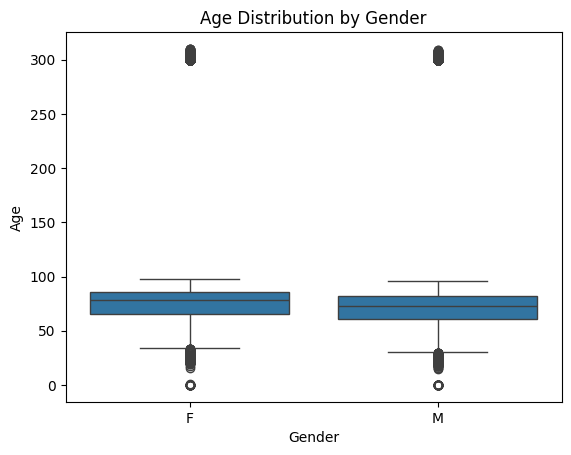

In [15]:


from datetime import datetime
df = patients
# calculate age
def calculate_age(DOB , DOD):
    # Convert dob and dod to strings if they are Timestamp objects
    # The DOB and DOD values are likely strings, so we need to convert them to datetime objects
    try:
        # Attempt to convert to datetime if it's a string
        DOB = datetime.strptime(str(DOB), "%Y-%m-%d %H:%M:%S")
        DOD = datetime.strptime(str(DOD), "%Y-%m-%d %H:%M:%S")
    except (TypeError, ValueError):
        # If conversion fails, return NaN (or any other value you want to use for missing ages)
        return float('nan')  # or return None, 0, etc.

    # Now you can format them back into strings if needed
    dob_date = datetime.strftime(DOB, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strftime(DOD, "%Y-%m-%d %H:%M:%S")

    # Calculate age (you likely want to calculate the difference in years)
    age = (DOD - DOB).days // 365
    return age


# Apply calculate age
df['age'] = df.apply(lambda row: calculate_age(row['DOB'], row['DOD']), axis=1) #Uncomment this line to calculate and add the 'age' column

# Display the DataFrame with the new 'age' column
#print(df)

# filter age
#filter_df = df[df["age"] <120]

#display
#print(filter_df)


# Extract the 'subject_id' and 'gender' columns
gender_info = patients[['SUBJECT_ID', 'GENDER']]

# Display the first few rows of the gender information
print(gender_info.head())


#  Age by Gender
sns.boxplot(data=df, x='GENDER', y='age')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()
# %%